In [4]:
import pandas as pd

# Load datasets
cab_data = pd.read_csv("Cab_Data.csv")
city_data = pd.read_csv("City.csv")
customer_data = pd.read_csv("Customer_ID.csv")
transaction_data = pd.read_csv("Transaction_ID.csv")

# Show first 5 rows of each dataset
print("Cab Data:\n", cab_data.head())
print("\nCity Data:\n", city_data.head())
print("\nCustomer Data:\n", customer_data.head())
print("\nTransaction Data:\n", transaction_data.head())


Cab Data:
    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

City Data:
              City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 

Customer Data:
    Customer ID Gender  Age  Income (USD/Month)
0        29290   Male  

In [6]:
# Check for missing values
print("Missing Values in Cab Data:\n", cab_data.isnull().sum())
print("Missing Values in City Data:\n", city_data.isnull().sum())
print("Missing Values in Customer Data:\n", customer_data.isnull().sum())
print("Missing Values in Transaction Data:\n", transaction_data.isnull().sum())

# Convert Date of Travel to datetime
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"])

# Convert Population & Users to integer (removing commas)
city_data["Population"] = city_data["Population"].str.replace(",", "").astype(int)
city_data["Users"] = city_data["Users"].str.replace(",", "").astype(int)

# Drop duplicates
cab_data.drop_duplicates(inplace=True)
transaction_data.drop_duplicates(inplace=True)
customer_data.drop_duplicates(inplace=True)
city_data.drop_duplicates(inplace=True)

print("Data Cleaning Complete ✅")


Missing Values in Cab Data:
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
Missing Values in City Data:
 City          0
Population    0
Users         0
dtype: int64
Missing Values in Customer Data:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Missing Values in Transaction Data:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


AttributeError: Can only use .str accessor with string values!

In [8]:
# Merge Cab_Data with Transaction_ID
merged_data = pd.merge(cab_data, transaction_data, on="Transaction ID", how="left")

# Merge with Customer_ID
merged_data = pd.merge(merged_data, customer_data, on="Customer ID", how="left")

# Merge with City Data
merged_data = pd.merge(merged_data, city_data, on="City", how="left")

# Show merged dataset
print(merged_data.head())


   Transaction ID                Date of Travel   Company        City  \
0        10000011 1970-01-01 00:00:00.000042377  Pink Cab  ATLANTA GA   
1        10000012 1970-01-01 00:00:00.000042375  Pink Cab  ATLANTA GA   
2        10000013 1970-01-01 00:00:00.000042371  Pink Cab  ATLANTA GA   
3        10000014 1970-01-01 00:00:00.000042376  Pink Cab  ATLANTA GA   
4        10000015 1970-01-01 00:00:00.000042372  Pink Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  \
0         30.45         370.95       313.635        29290         Card   Male   
1         28.62         358.52       334.854        27703         Card   Male   
2          9.04         125.20        97.632        28712         Cash   Male   
3         33.17         377.40       351.602        28020         Cash   Male   
4          8.73         114.62        97.776        27182         Card   Male   

   Age  Income (USD/Month)  Population  Users  
0   28               10813

In [11]:
company_performance = merged_data.groupby("Company").agg(
    Total_Revenue=("Price Charged", "sum"),
    Total_Cost=("Cost of Trip", "sum"),
    Total_Trips=("Transaction ID", "count")
)

# Calculate Profit and Profit Margin
company_performance["Total_Profit"] = company_performance["Total_Revenue"] - company_performance["Total_Cost"]
company_performance["Profit_Margin"] = (company_performance["Total_Profit"] / company_performance["Total_Revenue"]) * 100

print(company_performance)


            Total_Revenue    Total_Cost  Total_Trips  Total_Profit  \
Company                                                              
Pink Cab     2.632825e+07  2.102092e+07        84711  5.307328e+06   
Yellow Cab   1.258539e+08  8.183351e+07       274681  4.402037e+07   

            Profit_Margin  
Company                    
Pink Cab        20.158302  
Yellow Cab      34.977365  


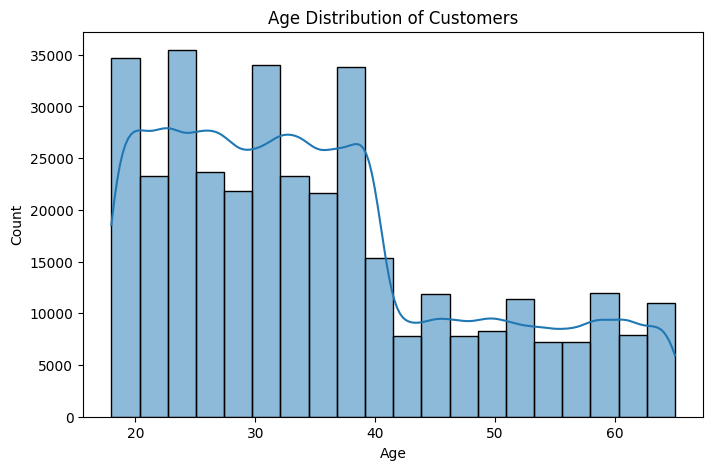

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(merged_data["Age"], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.show()



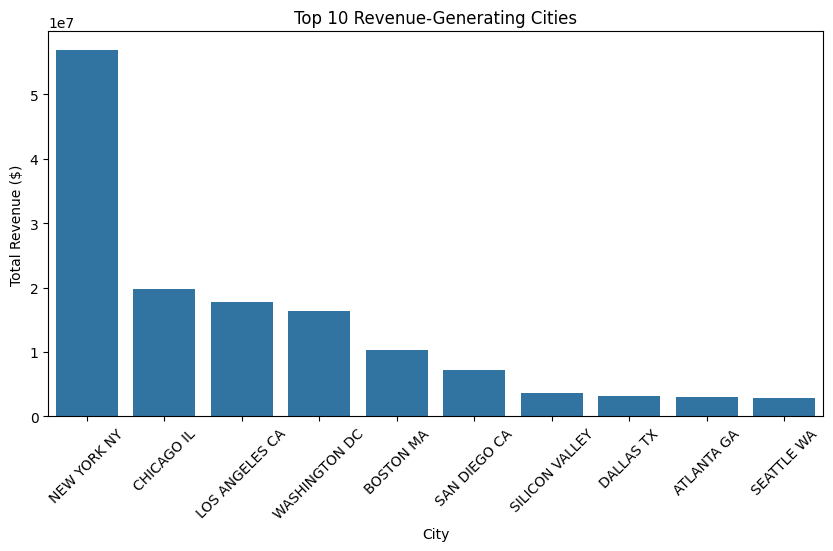

In [15]:
top_cities = merged_data.groupby("City")["Price Charged"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.xticks(rotation=45)
plt.title("Top 10 Revenue-Generating Cities")
plt.ylabel("Total Revenue ($)")
plt.show()


In [16]:
from scipy.stats import ttest_ind

# Divide customers into groups
young_customers = merged_data[merged_data["Age"] < 30]["Price Charged"]
older_customers = merged_data[merged_data["Age"] >= 30]["Price Charged"]

# Perform T-Test
t_stat, p_value = ttest_ind(young_customers, older_customers, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in spending between younger and older customers.")
else:
    print("There is no significant difference in spending between younger and older customers.")


T-Statistic: 0.39125424812030785, P-Value: 0.695609595866447
There is no significant difference in spending between younger and older customers.
